<hr style="border:2px solid">
<h1 style="text-align:center; font-size: 3em;">Notebook Overview</h1>
<hr style="border-top:1px dashed">
<h1 style="color:black; text-align:left">Notebook Navigation</h1>
<br>
In this Spark Introduction, we will go over:
    <ul>
        <li><a href="#anchorWhatIsSpark">What is Apache Spark?</a></li> 
        <li><a href="#anchorConcepts&KeyTerms">Concepts and Key Terms</a></li>
        <li><a href="#anchorInstallation">Apache PySpark Installation</a></li>
        <li><a href="#anchorBasics">PySpark Basics</a></li>
        <li><a href="#anchorPySparkSQL">PySparkSQL</a></li>
        <li><a href="#anchorPySparkML">PySpark ML</a></li>
        <li><a href="#anchorConclusion">Conclusion</a></li>                
    </ul>

### Setup Pyspark

In [29]:
#pyspark
import findspark
findspark.init()

<a name="anchorBasics" style="position:absolute;"></a>
<hr style="border:2px solid">
<h1 style="text-align:center; font-size: 3em;">PySpark Basics</h1>
<hr style="border-top:1px dashed">

### Starting a SparkSession

A SparkSession is an object that provides a starting point to interact with the Spark functionality and its APIs. 

In [30]:
#pandas
import pyspark
import pandas as pd
from pyspark.sql import SparkSession

In [31]:
#Spark Session
spark=SparkSession.builder.appName('TheBasics').getOrCreate()

<a name="apacheRDD" style="position:absolute;"></a>
### RDDs

A feature in PySpark that you may not be used to working with in Python is a Resilient Distributed Dataset (RDD). RDDs are a fundamental data structure of PySpark that is fault-tolerant and immutable (meaning it cannot be changed). Each dataset in an RDD is divided into logical partitions which can be divided onto separate worker nodes for faster computation. RDDs are mostly suited towards unstructured data such as media streams or streams of text. They are also not bound by a columnar schema (like a dataframe in pandas is). 

#### Creating an RDD

There are several ways to create an RDD. Two such ways are the parallelize() function which will convert a list to an RDD and the textFile() function which will take a text file as the input and convert it into an RDD

In [32]:
#using parallelise()
ex_data = [("student1", 59), ("student2", 73), ("student3",  98), ("student2", 62 )]
rdd = spark.sparkContext.parallelize(ex_data) #rdd is a pyspark object - Takes data from variable 

In [33]:
# collect
rdd.collect() #Very expensive command - Picking data from multiple sources

[('student1', 59), ('student2', 73), ('student3', 98), ('student2', 62)]

#### RDD Operations

There are two kinds of operations that can be performed on an RDD: transformations and actions. <br> Transformations are lazy operations that actually return a new RDD rather than updating the current one (as RDDs are immutable). Actions are operations that return RDD values to the driver node. 

##### Transformations

Transformations include `flatMap()`, `map()`, `reduceByKey()`,`sortByKey()`, and `filter()`

In [34]:
rdd.map(lambda x: (x)).collect()


#map is useful as we can apply a function to each element of a RDD

[('student1', 59), ('student2', 73), ('student3', 98), ('student2', 62)]

In [35]:
# filter
rdd.filter(lambda x: x[1]>70).collect()

[('student2', 73), ('student3', 98)]

In [36]:
rdd.reduceByKey(max).collect()

[('student2', 73), ('student1', 59), ('student3', 98)]

In [37]:

#notice now how each student only appears once

##### Actions

Actions include `count()`, `collect()`, `first()`, `max()`, and `reduce()`

In [38]:
#1
rdd.count()

4

In [39]:
#2
rdd.first()

('student1', 59)

In [40]:
#3
rdd.max()

('student3', 98)

In [41]:
rdd.reduce(min)

('student1', 59)

### DataFrames

Like an RDD, a DataFrame is an immutable collection of data; however, unlike an RDD, data is organized by columns, like a table in a relational database. If you are familiar with dataframes in pandas, then you should have a good idea of the structure here. The difference between a pandas dataframe and a PySpark dataframe is that in Spark, dataframes are distributed in the cluster. Due to parallel execution on all cores on multiple machines, PySpark runs operations much faster then pandas. By allowing developers to impose a structure (& schema) on a collection of data, higher-level abstraction is also allowed. 

#### Creating a DataFrame

A dataframe can be created in several ways including: <br>
- from an existing RDD
- from a list 
- from an external data source

In [42]:
#from existing rdd

df_from_rdd = rdd.toDF()

#from a list
data_list = [('John','','Doe','1998-04-08','M',2000),
  ('Michael','Williams','','2002-05-24','M',3000),
  ('James','','Jones','1981-09-09','M',4000),
  ('Maria','Anne','Jones','1973-12-08','F',4000),
  ('Mary','Beth','Doe','1985-02-13','F',-1)]

## Define columns
columns = ["firstname","middlename","lastname","dob","gender","salary"]
df_from_list = spark.createDataFrame(data = data_list, schema = columns)


#### Reading External Data

In [43]:
# Read from json
#absolutely not an RDD anymore, a dah-ta frame
df_from_json=spark.read.json('./Data/people.json')               #

We will cover more ways to read in external data later

#### Basic Functions

Showing the data

In [44]:
# Show data
df_from_list.show()

+---------+----------+--------+----------+------+------+
|firstname|middlename|lastname|       dob|gender|salary|
+---------+----------+--------+----------+------+------+
|     John|          |     Doe|1998-04-08|     M|  2000|
|  Michael|  Williams|        |2002-05-24|     M|  3000|
|    James|          |   Jones|1981-09-09|     M|  4000|
|    Maria|      Anne|   Jones|1973-12-08|     F|  4000|
|     Mary|      Beth|     Doe|1985-02-13|     F|    -1|
+---------+----------+--------+----------+------+------+



In [45]:
# Show data
df_from_list.printSchema()

root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)



Looking at data architecture

In [46]:
# Data architecture
df_from_json.printSchema()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



In [47]:
# Data architecture


<div class="alert alert-block alert-info">
    <b>Note:</b> printSchema() is similar to .info() in pandas.
</div>

In [48]:
#get column names
df_from_rdd.columns

['_1', '_2']

Notice how in our `df_from_json` dataframe age is of the type string. Some data types make it easier to infer schema (like tabular formats such as csv which we will show later). <br> However you often have to set the schema yourself if you aren't dealing with a .read method that doesn't have inferSchema() built-in. This can be handled easily as spark has all the tools you need for this, it just requires a very specific structure:

In [51]:
# Structure Fields
from pyspark.sql.types import StructField, StringType, IntegerType, StructType

First, we need to create the list of Structure fields:
- :param `name`: string, name of the field.
- :param `dataType`: :class: DataType of the field.
- :param `nullable`: boolean, whether the field can be null (None) or not.

In [52]:
#Schema
json_data_schema=[StructField("age", IntegerType(), True),
                  StructField("name", StringType(), True)]

In [53]:
# Structure
final_struc=StructType(fields=json_data_schema)

Now, we can read in the json file with the defined schema

In [54]:
# Read the people.json file with the new schema
df_from_json_schemed = spark.read.json('./Data/people.json', schema=final_struc)

In [55]:
# output
df_from_json_schemed

DataFrame[age: int, name: string]

#### Grabbing The Data

In [56]:
#creating a copy of df_from_json_schemed as df
df = df_from_json_schemed.alias('df')

In [57]:
#ensuring copy is not an alias
id(df_from_json_schemed) ==id(df)

False

In [58]:
# output
df.show()

+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [59]:
#grabbing a column object
df['age']

Column<'age'>

In [60]:
# type of age column
type(df['age'])

pyspark.sql.column.Column

In [61]:
# age column
df.select('age').show()

+----+
| age|
+----+
|null|
|  30|
|  19|
+----+



**NOTE**: Notice how using select returns a dataframe

In [64]:
#Use collect() to display 
df.select('age').collect()

[Row(age=None), Row(age=30), Row(age=19)]

In [65]:
# Returns list of Row objects
df.head()

Row(age=None, name='Michael')

Multiple columns:

In [66]:
# Multiple columns:  age and name
df.select(['age','name']).show()

+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [67]:
# output
df.withColumnRenamed('age','supernewage').show()

+-----------+-------+
|supernewage|   name|
+-----------+-------+
|       null|Michael|
|         30|   Andy|
|         19| Justin|
+-----------+-------+



#### Creating New Columns

In [69]:
# Adding a new column with a simple copy
df.withColumn('newage',df['age']).show()

+----+-------+------+
| age|   name|newage|
+----+-------+------+
|null|Michael|  null|
|  30|   Andy|    30|
|  19| Justin|    19|
+----+-------+------+



In [70]:
# doubleage column
df.withColumn('double',df['age']*2).show()

+----+-------+------+
| age|   name|double|
+----+-------+------+
|null|Michael|  null|
|  30|   Andy|    60|
|  19| Justin|    38|
+----+-------+------+



In [71]:
# add_one_age column
df.withColumn('agenew',df['age']+1).show()

+----+-------+------+
| age|   name|agenew|
+----+-------+------+
|null|Michael|  null|
|  30|   Andy|    31|
|  19| Justin|    20|
+----+-------+------+



<a name="anchorPySparkSQL" style="position:absolute;"></a>
<hr style="border:2px solid">
<h1 style="text-align:center; font-size: 3em;">PySpark SQL and Data Wrangling</h1>
<hr style="border-top:1px dashed">

PySpark SQL establishes the connection between the RDD and relational table. It provides much closer integration between relational and procedural processing through declarative Dataframe API, which is integrated with Spark code.

Using SQL, it can be easily accessible to more users and improve optimization for the current ones. It also supports the wide range of data sources and algorithms in Big-data. If you have a basic understanding of RDBMS, PySpark SQL will be easy to use, where you can extend the limitation of traditional relational data processing.

To use SQL queries directly with the dataframe, you will need to register it to a temporary view: <br>
Lets use the `df_from_list` dataframe we created

In [74]:
# df_from_list
df_from_list.printSchema()

df = spark.createDataFrame(data = data_list,schema = final_struc)

root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)



ValueError: Length of object (6) does not match with length of fields (2)

In [ ]:
#fixing schema
list_data_schema = [StructField("firstname", StringType(), True),
                    StructField("middlename", StringType(), True),
                    StructField("lastname", StringType(), True),
                    StructField("dob", StringType(), True),
                    StructField("gender", StringType(), True),
                    StructField("salary", IntegerType(), True)]
final_struc = StructType(fields=list_data_schema)

In [ ]:
# Dataframe
df.createOrReplaceTempView("people")

In [75]:
df.show()

+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



#### Why Define Schema?

Defining a data's schema has two main advantages:<br>
- the user can ensure that the dtypes for each column is correct
- the load-in times for data are much faster when spark does not have to try and infer the schema for each column

In [77]:
# Register the DataFrame as a SQL temporary view

df = spark.read.csv('./Data/appl_stock.csv',inferSchema=True,header=True)

In [78]:
# Query
df.show()


+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|               Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04 00:00:00|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05 00:00:00|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06 00:00:00|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07 00:00:00|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08 00:00:00|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|    

In [79]:
# output
df.select('open', 'close').filter("close<500").show()

+------------------+------------------+
|              open|             close|
+------------------+------------------+
|        213.429998|        214.009998|
|        214.599998|        214.379993|
|        214.379993|        210.969995|
|            211.75|            210.58|
|        210.299994|211.98000499999998|
|212.79999700000002|210.11000299999998|
|209.18999499999998|        207.720001|
|        207.870005|        210.650002|
|210.11000299999998|            209.43|
|210.92999500000002|            205.93|
|        208.330002|        215.039995|
|        214.910006|            211.73|
|        212.079994|        208.069996|
|206.78000600000001|            197.75|
|202.51000200000001|        203.070002|
|205.95000100000001|        205.940001|
|        206.849995|        207.880005|
|        204.930004|        199.289995|
|        201.079996|        192.060003|
|192.36999699999998|        194.729998|
+------------------+------------------+
only showing top 20 rows



In [80]:
# Display results from the query
df.filter('close<200').show()

+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|               Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-22 00:00:00|206.78000600000001|        207.499996|            197.16|            197.75|220441900|         25.620401|
|2010-01-28 00:00:00|        204.930004|        205.500004|        198.699995|        199.289995|293375600|25.819922000000002|
|2010-01-29 00:00:00|        201.079996|        202.199995|        190.250002|        192.060003|311488100|         24.883208|
|2010-02-01 00:00:00|192.36999699999998|             196.0|191.29999899999999|        194.729998|187469100|         25.229131|
|2010-02-02 00:00:00|        195.909998|        196.319994|193.37999299999998|        195.859997|174585600|25.3

In [81]:
# Query and show the reults in one line 
df.filter(df['close']<200).show()

+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|               Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-22 00:00:00|206.78000600000001|        207.499996|            197.16|            197.75|220441900|         25.620401|
|2010-01-28 00:00:00|        204.930004|        205.500004|        198.699995|        199.289995|293375600|25.819922000000002|
|2010-01-29 00:00:00|        201.079996|        202.199995|        190.250002|        192.060003|311488100|         24.883208|
|2010-02-01 00:00:00|192.36999699999998|             196.0|191.29999899999999|        194.729998|187469100|         25.229131|
|2010-02-02 00:00:00|        195.909998|        196.319994|193.37999299999998|        195.859997|174585600|25.3

##### Using Boolean Expressions

<div class="alert alert-block alert-info">
    <b>Note:</b> The next produce will cause an error, make sure to read the error!
</div>

In [90]:
# Closing price less than $200 and opening price greater than $200
df.filter('close<200 and open>200').show()

+-------------------+------------------+----------+----------+----------+---------+------------------+
|               Date|              Open|      High|       Low|     Close|   Volume|         Adj Close|
+-------------------+------------------+----------+----------+----------+---------+------------------+
|2010-01-22 00:00:00|206.78000600000001|207.499996|    197.16|    197.75|220441900|         25.620401|
|2010-01-28 00:00:00|        204.930004|205.500004|198.699995|199.289995|293375600|25.819922000000002|
|2010-01-29 00:00:00|        201.079996|202.199995|190.250002|192.060003|311488100|         24.883208|
+-------------------+------------------+----------+----------+----------+---------+------------------+



In [91]:
df.filter((df['close']>200) & (df['open']>200)).show()

+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|               Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04 00:00:00|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05 00:00:00|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06 00:00:00|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07 00:00:00|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08 00:00:00|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|    

In [93]:
#(Closing price less than $200 and opening price greater than $200)
df.filter('close<200 and open>200').show()

+-------------------+------------------+----------+----------+----------+---------+------------------+
|               Date|              Open|      High|       Low|     Close|   Volume|         Adj Close|
+-------------------+------------------+----------+----------+----------+---------+------------------+
|2010-01-22 00:00:00|206.78000600000001|207.499996|    197.16|    197.75|220441900|         25.620401|
|2010-01-28 00:00:00|        204.930004|205.500004|198.699995|199.289995|293375600|25.819922000000002|
|2010-01-29 00:00:00|        201.079996|202.199995|190.250002|192.060003|311488100|         24.883208|
+-------------------+------------------+----------+----------+----------+---------+------------------+



In [95]:
# The same thing using SQL context
df.filter('close<200 or open>200').show()

+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|               Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04 00:00:00|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05 00:00:00|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06 00:00:00|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07 00:00:00|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08 00:00:00|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|    

In [96]:
df.createOrReplaceTempView("apple")
sql_results=spark.sql("SELECT * FROM apple WHERE open > 300").show()# Output: Dataframe 

+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|               Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-10-13 00:00:00|        300.200008|        301.959995|        299.799999|300.14000699999997|157523100|         38.886005|
|2010-10-14 00:00:00|        301.690002|        302.469994|        300.400013|302.30998999999997|108824100|         39.167147|
|2010-10-15 00:00:00|307.43998700000003|             315.0|        304.909996|314.73999399999997|230548500|         40.777572|
|2010-10-18 00:00:00|        318.470013|        319.000011|        314.289997|        317.999989|273252700|         41.199936|
|2010-10-19 00:00:00|303.40000200000003|        313.770012|300.02000400000003|309.48999399999997|308196000|40.0

In [97]:
# Closing price less than $200 and opening price not greater than $200.
df.filter( (df["close"]<200) &~(df["open"]>200)).show()

+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|               Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-02-01 00:00:00|192.36999699999998|             196.0|191.29999899999999|        194.729998|187469100|         25.229131|
|2010-02-02 00:00:00|        195.909998|        196.319994|193.37999299999998|        195.859997|174585600|25.375532999999997|
|2010-02-03 00:00:00|        195.169994|        200.200003|        194.420004|        199.229994|153832000|25.812148999999998|
|2010-02-04 00:00:00|        196.730003|        198.370001|        191.570005|        192.050003|189413000|         24.881912|
|2010-02-05 00:00:00|192.63000300000002|             196.0|        190.850002|        195.460001|212576700|25.3

In [99]:
# Low price is equal to $197.16
df.filter(df['low']==197.16).show()

+-------------------+------------------+----------+------+------+---------+---------+
|               Date|              Open|      High|   Low| Close|   Volume|Adj Close|
+-------------------+------------------+----------+------+------+---------+---------+
|2010-01-22 00:00:00|206.78000600000001|207.499996|197.16|197.75|220441900|25.620401|
+-------------------+------------------+----------+------+------+---------+---------+



In [100]:
#Same thing.  SQL Version
df.filter("low ilike 197.16").show()

+-------------------+------------------+----------+------+------+---------+---------+
|               Date|              Open|      High|   Low| Close|   Volume|Adj Close|
+-------------------+------------------+----------+------+------+---------+---------+
|2010-01-22 00:00:00|206.78000600000001|207.499996|197.16|197.75|220441900|25.620401|
+-------------------+------------------+----------+------+------+---------+---------+



Instead of just showing our outputs, we can also collect them as <u> Python objects </u>

In [101]:
# Collecting results as Python objects
df.filter(df['low']==197.16).collect()

[Row(Date=datetime.datetime(2010, 1, 22, 0, 0), Open=206.78000600000001, High=207.499996, Low=197.16, Close=197.75, Volume=220441900, Adj Close=25.620401)]

##### For Reference

`show()` - Displays/Prints a number of rows in a tabular format. By default it displays 20 rows and to change the default number, you can pass a value to show(n). <br><br> `take(n)` returns first n rows as Array of row objects. It is an alias for `first()`. <br><br> `limit(n)` returns a new dataframe <br><br> Spark `collect()` and `collectAsList()` are action operations that are used to retrieve all the elements of the RDD/DataFrame/Dataset (from all nodes) to the driver node. We should use the `collect()` on smaller datasets usually after filter(), group(), count() e.t.c. **Retrieving on larger dataset results in out of memory errors.**

In [102]:
# Collecting results as Python objects, store the results
result =df.filter(df['low']==197.16).collect()

In [103]:
# Note the nested structure returns a nested row object
type(result)

list

In [104]:
# first row
result[0]

Row(Date=datetime.datetime(2010, 1, 22, 0, 0), Open=206.78000600000001, High=207.499996, Low=197.16, Close=197.75, Volume=220441900, Adj Close=25.620401)

In [105]:
# type of first row
type(result[0])

pyspark.sql.types.Row

In [106]:
# first row, store the result
row = result[0]

In [107]:
# Rows can be called to turn into dictionaries
x=row.asDict()

## Handling Missing Data

#### Finding missing data

In [109]:
df= spark.read.csv('./Data/ContainsNull.csv', inferSchema=True,header=True)

In [112]:
## how do we find out the rows with missing values?
df.where(df['Sales'].isNull()).show()

+----+----+-----+
|  Id|Name|Sales|
+----+----+-----+
|emp1|John| null|
|emp2|null| null|
+----+----+-----+



In [113]:
from pyspark.sql.functions import col,isnan, when, count
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+----+-----+
| Id|Name|Sales|
+---+----+-----+
|  0|   2|    2|
+---+----+-----+



#### Drop missing data

In [116]:
# Drop any row that contains missing data
df.na.drop().show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp4|Cindy|456.0|
+----+-----+-----+



Notice Id: emp2 has been dropped

In [118]:
#drop any rows where the Sales column value is null
df.na.drop(subset='Sales').show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp3| null|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



#### Fill in missing values

In [121]:
# Fills all numeric type column
x=df.na.fill(34).na.fill('dfdfd').show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John| 34.0|
|emp2|dfdfd| 34.0|
|emp3|dfdfd|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



In [122]:
# Specify what columns you want to fill with the subset parameter
df.na.fill('No name', subset=['Name']).show()

+----+-------+-----+
|  Id|   Name|Sales|
+----+-------+-----+
|emp1|   John| null|
|emp2|No name| null|
|emp3|No name|345.0|
|emp4|  Cindy|456.0|
+----+-------+-----+



In [123]:
# Mean Sales value
from pyspark.sql.functions import mean


In [124]:
mean_val = df.select(mean(df['Sales'])).collect()
mean_val[0][0]

400.5

In [125]:
# output
df.na.fill(mean_val[0][0]).show()

+----+-----+-----+
|  Id| Name|Sales|
+----+-----+-----+
|emp1| John|400.5|
|emp2| null|400.5|
|emp3| null|345.0|
|emp4|Cindy|456.0|
+----+-----+-----+



In [126]:
# Display mean value
df=spark.read.csv('./Data/sales_info.csv',inferSchema=True,header=True)

In [127]:
# fill missing values with the mean
df.groupBy("Company").mean().show()

+-------+-----------------+
|Company|       avg(Sales)|
+-------+-----------------+
|   APPL|            370.0|
|   GOOG|            220.0|
|     FB|            610.0|
|   MSFT|322.3333333333333|
+-------+-----------------+



## Group By and Aggregate Functions

In [128]:
# Read input file:  ./Data/sales_info.csv
df.withColumn("fakes", df['sales']*2).groupBy("Company").mean().show()

+-------+-----------------+-----------------+
|Company|       avg(Sales)|       avg(fakes)|
+-------+-----------------+-----------------+
|   APPL|            370.0|            740.0|
|   GOOG|            220.0|            440.0|
|     FB|            610.0|           1220.0|
|   MSFT|322.3333333333333|644.6666666666666|
+-------+-----------------+-----------------+



In [129]:
# Schema
df.groupBy("Company").count().show()

+-------+-----+
|Company|count|
+-------+-----+
|   APPL|    4|
|   GOOG|    3|
|     FB|    2|
|   MSFT|    3|
+-------+-----+



In [131]:
# Mean sales for each company
df.groupBy("Company").mean().show()

+-------+-----------------+
|Company|       avg(Sales)|
+-------+-----------------+
|   APPL|            370.0|
|   GOOG|            220.0|
|     FB|            610.0|
|   MSFT|322.3333333333333|
+-------+-----------------+



In [132]:
# create a new column and find the mean of all numerical columns
df.groupBy("Company").max().show()

+-------+----------+
|Company|max(Sales)|
+-------+----------+
|   APPL|     750.0|
|   GOOG|     340.0|
|     FB|     870.0|
|   MSFT|     600.0|
+-------+----------+



In [135]:
# Max sales across everything
df.agg({'sales':'max'}).show()

+----------+
|max(sales)|
+----------+
|     870.0|
+----------+



In [136]:
# SQL like style
#import aggregate functions
from pyspark.sql.functions import countDistinct, avg, stddev

In [137]:
# Number of unique sales values
df.select(countDistinct('sales').alias('ref')).show()

+---+
|ref|
+---+
| 11|
+---+



In [138]:
# Number of unique sales values, change the column name
df.select(stddev('sales').alias('ref')).show()

+------------------+
|               ref|
+------------------+
|250.08742410799007|
+------------------+



In [141]:
# OrderBy (Ascending)
df.orderBy(['sales']).show()

+-------+-------+-----+
|Company| Person|Sales|
+-------+-------+-----+
|   GOOG|Charlie|120.0|
|   MSFT|    Amy|124.0|
|   APPL|  Linda|130.0|
|   GOOG|    Sam|200.0|
|   MSFT|Vanessa|243.0|
|   APPL|   John|250.0|
|   GOOG|  Frank|340.0|
|     FB|  Sarah|350.0|
|   APPL|  Chris|350.0|
|   MSFT|   Tina|600.0|
|   APPL|   Mike|750.0|
|     FB|   Carl|870.0|
+-------+-------+-----+



In [142]:
# Descending call off the column itself.
df.orderBy(['sales'], descending=True).show()

+-------+-------+-----+
|Company| Person|Sales|
+-------+-------+-----+
|   GOOG|Charlie|120.0|
|   MSFT|    Amy|124.0|
|   APPL|  Linda|130.0|
|   GOOG|    Sam|200.0|
|   MSFT|Vanessa|243.0|
|   APPL|   John|250.0|
|   GOOG|  Frank|340.0|
|     FB|  Sarah|350.0|
|   APPL|  Chris|350.0|
|   MSFT|   Tina|600.0|
|   APPL|   Mike|750.0|
|     FB|   Carl|870.0|
+-------+-------+-----+



### Writing Data

We can also take our output and write it back to an external file

In [143]:
# write the output to this csv file:  ./output/DescendingSales2.csv
df.orderBy(df["Sales"].desc()).write.csv("DescendingSales2.csv")

AnalysisException: path file:/home/jovyan/work/Python/Pyspark/DescendingSales2.csv already exists.

If you run this code chunk you will notice that instead of loading the data to a single .csv, a folder with a set of .csv files is created. The drawback here is that if the destination tool for the newly written .csv files doesn't know how to concatenate them, you'll have to do it yourself <br><br> HOWEVER, if we are in jupyter, we can use pandas to write to a .csv

<a name="anchorPySparkML" style="position:absolute;"></a>
<hr style="border:2px solid">
<h1 style="text-align:center; font-size: 3em;">PySpark MLlib</h1>
<hr style="border-top:1px dashed">

### Example: Exploring with PySpark & MLlib

###### About The Data
[California Housing Data](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html)

The California Housing data set is derived from the 1990 California census data. This dataset first appeared in a 1997 paper: "Sparse Spatial Autoregressions", written by Pace, R. Kelley and Ronald Barry.

The data contains one row per census block group, where a block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area.

The data has 20,640 rows and 10 columns (one for median house value (per block) and 9 other features)

`Longitude`:refers to the angular distance of a geographic place north or south of the earth’s equator for each block group <br>
`Latitude`:refers to the angular distance of a geographic place east or west of the earth’s equator for each block group <br>
`Housing Median Age`:is the median age of the people that belong to a block group. Note that the median is the value that lies at the midpoint of a frequency distribution of observed values <br>
`Total Rooms`:is the total number of rooms in the houses per block group <br>
`Total Bedrooms`:is the total number of bedrooms in the houses per block group <br>
`Population`:is the number of inhabitants of a block group <br>
`Households`:refers to units of houses and their occupants per block group <br>
`Median Income`:is used to register the median income of people that belong to a block group <br>
`Median House Value`:is the dependent variable and refers to the median house value per block group

#### Importing Libraries

In [145]:
# import libraries

import numpy as np
from pyspark.sql.types import * #so we can better define schemas
import matplotlib.pyplot as plt #for plotting
import pyspark.sql.functions as F
from pyspark.sql.functions import col #used for calling column names in pyspark. Fairly equivalent to df["col_name"]
from pyspark.ml.feature import VectorAssembler, StandardScaler


In [146]:
# Lets set a random seed for notebook reproducibility


rnd_seed= 42
np.random.seed=rnd_seed
np.random.set_state=rnd_seed


###### Creating a Spark Session

In [147]:
# create a Spark Session:  cal_example
spark = SparkSession.builder.appName("cal_example").getOrCreate()

22/09/13 17:29:59 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


###### Reading In The Data

In [148]:
#defining a schema
schema = StructType([
    StructField("long", FloatType(), nullable=True),
    StructField("lat", FloatType(), nullable=True),
    StructField("medage", FloatType(), nullable=True),
    StructField("totrooms", FloatType(), nullable=True),
    StructField("totbdrms", FloatType(), nullable=True),
    StructField("pop", FloatType(), nullable=True),
    StructField("houshlds", FloatType(), nullable=True),
    StructField("medinc", FloatType(), nullable=True),
    StructField("medhv", FloatType(), nullable=True)]
)

In [149]:
# Read csv file:  ./Data/cal_housing.data
cal_housing_df = spark.read.csv('./Data/cal_housing.data', schema = schema)

###### Exploring The Raw Data

In [150]:
# Spark:  show first 5 rows
cal_housing_df.take(5)

[Row(long=-122.2300033569336, lat=37.880001068115234, medage=41.0, totrooms=880.0, totbdrms=129.0, pop=322.0, houshlds=126.0, medinc=8.325200080871582, medhv=452600.0),
 Row(long=-122.22000122070312, lat=37.86000061035156, medage=21.0, totrooms=7099.0, totbdrms=1106.0, pop=2401.0, houshlds=1138.0, medinc=8.301400184631348, medhv=358500.0),
 Row(long=-122.23999786376953, lat=37.849998474121094, medage=52.0, totrooms=1467.0, totbdrms=190.0, pop=496.0, houshlds=177.0, medinc=7.257400035858154, medhv=352100.0),
 Row(long=-122.25, lat=37.849998474121094, medage=52.0, totrooms=1274.0, totbdrms=235.0, pop=558.0, houshlds=219.0, medinc=5.643099784851074, medhv=341300.0),
 Row(long=-122.25, lat=37.849998474121094, medage=52.0, totrooms=1627.0, totbdrms=280.0, pop=565.0, houshlds=259.0, medinc=3.8461999893188477, medhv=342200.0)]

In [151]:
# do the same thing using Pandas
cal_housing_df.show(3)

+-------+-----+------+--------+--------+------+--------+------+--------+
|   long|  lat|medage|totrooms|totbdrms|   pop|houshlds|medinc|   medhv|
+-------+-----+------+--------+--------+------+--------+------+--------+
|-122.23|37.88|  41.0|   880.0|   129.0| 322.0|   126.0|8.3252|452600.0|
|-122.22|37.86|  21.0|  7099.0|  1106.0|2401.0|  1138.0|8.3014|358500.0|
|-122.24|37.85|  52.0|  1467.0|   190.0| 496.0|   177.0|7.2574|352100.0|
+-------+-----+------+--------+--------+------+--------+------+--------+
only showing top 3 rows



In [152]:
# column names
cal_housing_df.head()

Row(long=-122.2300033569336, lat=37.880001068115234, medage=41.0, totrooms=880.0, totbdrms=129.0, pop=322.0, houshlds=126.0, medinc=8.325200080871582, medhv=452600.0)

In [153]:
# Schema
cal_housing_df.schema

StructType([StructField('long', FloatType(), True), StructField('lat', FloatType(), True), StructField('medage', FloatType(), True), StructField('totrooms', FloatType(), True), StructField('totbdrms', FloatType(), True), StructField('pop', FloatType(), True), StructField('houshlds', FloatType(), True), StructField('medinc', FloatType(), True), StructField('medhv', FloatType(), True)])

In [154]:
# Data types
cal_housing_df.dtypes

[('long', 'float'),
 ('lat', 'float'),
 ('medage', 'float'),
 ('totrooms', 'float'),
 ('totbdrms', 'float'),
 ('pop', 'float'),
 ('houshlds', 'float'),
 ('medinc', 'float'),
 ('medhv', 'float')]

In [155]:
# show the first 5 values of the pop and totbdrms columns
cal_housing_df.groupBy("medage").count().sort("count",ascending=False).show(5)

+------+-----+
|medage|count|
+------+-----+
|  52.0| 1273|
|  36.0|  862|
|  35.0|  824|
|  16.0|  771|
|  17.0|  698|
+------+-----+
only showing top 5 rows



In [156]:
#get most common median age
median_age_counts=cal_housing_df.groupBy("medage").count().sort("count",ascending=False)

In [157]:
#saving median ages
median_age_counts = cal_housing_df.groupBy("medage").count().sort("medage", ascending=False)

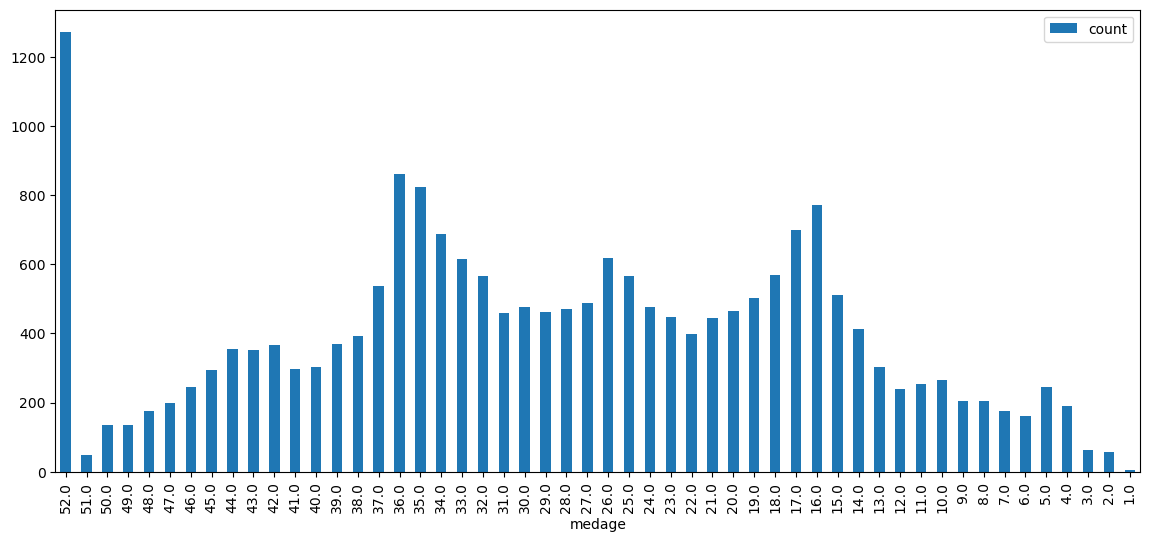

In [158]:
# Plot median age (bar chart)
median_age_counts.toPandas().plot.bar(x='medage',figsize=(14,6));

In [159]:
#getting summary statistics of feature columns
cal_housing_df.describe().select(
                                            "summary",
                    F.round("medage", 4).alias("medage"),
                    F.round("totrooms", 4).alias("totrooms"),
                    F.round("totbdrms", 4).alias("totbdrms"),
                    F.round("pop", 4).alias("pop"),
                    F.round("houshlds", 4).alias("houshlds"),
                    F.round("medinc", 4).alias("medinc"),
                    F.round("medhv", 4).alias("medhv")).show()


+-------+-------+---------+--------+---------+--------+-------+-----------+
|summary| medage| totrooms|totbdrms|      pop|houshlds| medinc|      medhv|
+-------+-------+---------+--------+---------+--------+-------+-----------+
|  count|20640.0|  20640.0| 20640.0|  20640.0| 20640.0|20640.0|    20640.0|
|   mean|28.6395|2635.7631| 537.898|1425.4767|499.5397| 3.8707|206855.8169|
| stddev|12.5856|2181.6153|421.2479|1132.4621|382.3298| 1.8998|115395.6159|
|    min|    1.0|      2.0|     1.0|      3.0|     1.0| 0.4999|    14999.0|
|    max|   52.0|  39320.0|  6445.0|  35682.0|  6082.0|15.0001|   500001.0|
+-------+-------+---------+--------+---------+--------+-------+-----------+



In [160]:
#DONT FORGET: we can also use python packages like pandas
cal_housing_df.describe().toPandas()

,summary,long,lat,medage,totrooms,totbdrms,pop,houshlds,medinc,medhv
0,count,20640,20640,20640,20640,20640,20640,20640,20640,20640
1,mean,-119.56970444871473,35.63186143109965,28.639486434108527,2635.7630813953488,537.8980135658915,1425.4767441860465,499.5396802325581,3.8706710030346416,206855.81690891474
2,stddev,2.003531742932898,2.135952380602968,12.58555761211163,2181.6152515827944,421.247905943133,1132.46212176534,382.3297528316098,1.8998217183639696,115395.61587441359
3,min,-124.35,32.54,1.0,2.0,1.0,3.0,1.0,0.4999,14999.0
4,max,-114.31,41.95,52.0,39320.0,6445.0,35682.0,6082.0,15.0001,500001.0


In [161]:
# convert to a pandas dataframe
cal_housing_df.na.drop(how='any').toPandas()

,long,lat,medage,totrooms,totbdrms,pop,houshlds,medinc,medhv
0,-122.230003,37.880001,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.220001,37.860001,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.239998,37.849998,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.250000,37.849998,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.250000,37.849998,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.089996,39.480000,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.209999,39.490002,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.220001,39.430000,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.320000,39.430000,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


###### Data Preprocessing

In [162]:
#drop any non-complete rows
cal_df=cal_housing_df.withColumn("medhv",col("medhv")/100000)


This shows us that all of the rows in this dataset are complete rows, since after removing the NA values we still have 20,640 rows

In this instance, we will be using the median house value (medhv) as our dependent variable. Since all of its values are so large, we can express the values differently 

In [163]:
# Normalise the values in the medhv column
cal_df=cal_housing_df.withColumn("medhv",col("medhv")/100000)

In [164]:
# Output
cal_df.head()

Row(long=-122.2300033569336, lat=37.880001068115234, medage=41.0, totrooms=880.0, totbdrms=129.0, pop=322.0, houshlds=126.0, medinc=8.325200080871582, medhv=4.526)

Now, the medhv column is in units of 100,000.

Looking at the columns we have now, we have 3 columns we can transform: <br>
- totrooms: This columns shows the total rooms of all of the households on this block. Instead, we should get the average rooms per household <br>
- pop: similarly to totrooms, pop gives the sum population for all of the households on a given row (block). Again, we should get the average per house <br>
- totbdrms: Again, we have an aggregate sum; however, this time it is not a factor of households, but of totrooms instead

In [165]:
# Add 3 new columns: rooms_per_household, pop_per_household, bedrooms_per_room
cal_df2 = cal_df.withColumn("rooms_per_household", F.round(col("totrooms")/col("houshlds"), 2)) \
                .withColumn("pop_per_household", F.round(col("pop")/col("houshlds"), 2)) \
                .withColumn("bedrooms_per_room", F.round(col("totbdrms")/col("totrooms"), 2))

In [166]:
# Output
cal_df2

DataFrame[long: float, lat: float, medage: float, totrooms: float, totbdrms: float, pop: float, houshlds: float, medinc: float, medhv: double, rooms_per_household: double, pop_per_household: double, bedrooms_per_room: double]

These 3 columns will give us much more insight into the median house value. For example, in the first row we can say that a 4.53 hundred thousand dollar home has (on average) 6.98 rooms, 15% of which are bedrooms, and house 2.56 people.

The next step will be to remove columns that we might not want to consider in our analysis.If we really wanted to, we could condense long & lat to be regions of california, but for the sake of ease lets just drop them. Additionally, we no longer need the totrooms and totbdrms columns since we changed their scope. Lastly, we can also drop the medage, as age of residents shouldn't affect the housing value.

In [167]:
# Re-order and select columns
cal_df3 = cal_df2.select("medhv",
                         "pop",
                         "houshlds",
                         "medinc",
                         "rooms_per_household",
                         "pop_per_household",
                         "bedrooms_per_room")



In [168]:
# Output
cal_df3.show()

+-----+------+--------+------+-------------------+-----------------+-----------------+
|medhv|   pop|houshlds|medinc|rooms_per_household|pop_per_household|bedrooms_per_room|
+-----+------+--------+------+-------------------+-----------------+-----------------+
|4.526| 322.0|   126.0|8.3252|               6.98|             2.56|             0.15|
|3.585|2401.0|  1138.0|8.3014|               6.24|             2.11|             0.16|
|3.521| 496.0|   177.0|7.2574|               8.29|              2.8|             0.13|
|3.413| 558.0|   219.0|5.6431|               5.82|             2.55|             0.18|
|3.422| 565.0|   259.0|3.8462|               6.28|             2.18|             0.17|
|2.697| 413.0|   193.0|4.0368|               4.76|             2.14|             0.23|
|2.992|1094.0|   514.0|3.6591|               4.93|             2.13|             0.19|
|2.414|1157.0|   647.0|  3.12|                4.8|             1.79|             0.22|
|2.267|1206.0|   595.0|2.0804|             

#### Feature Extraction

In [169]:
# initialise column names
featurecols = ["pop", "houshlds", "medinc", "rooms_per_household", "pop_per_household", "bedrooms_per_room"]


In [170]:
#using VectorAssembler, we can put features into a feature vector column:
assembler = VectorAssembler(inputCols=featurecols, outputCol="features")


In [171]:
# transform
assembled_df = assembler.transform(cal_df3)



In [172]:
# output
assembled_df.show(5)


+-----+------+--------+------+-------------------+-----------------+-----------------+--------------------+
|medhv|   pop|houshlds|medinc|rooms_per_household|pop_per_household|bedrooms_per_room|            features|
+-----+------+--------+------+-------------------+-----------------+-----------------+--------------------+
|4.526| 322.0|   126.0|8.3252|               6.98|             2.56|             0.15|[322.0,126.0,8.32...|
|3.585|2401.0|  1138.0|8.3014|               6.24|             2.11|             0.16|[2401.0,1138.0,8....|
|3.521| 496.0|   177.0|7.2574|               8.29|              2.8|             0.13|[496.0,177.0,7.25...|
|3.413| 558.0|   219.0|5.6431|               5.82|             2.55|             0.18|[558.0,219.0,5.64...|
|3.422| 565.0|   259.0|3.8462|               6.28|             2.18|             0.17|[565.0,259.0,3.84...|
+-----+------+--------+------+-------------------+-----------------+-----------------+--------------------+
only showing top 5 rows



Our feature column now contains the values for all of our feature variables in an array

### Standardization

In [173]:
# Initialise the `standardScaler`
standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")

In [174]:
#fitting our dataframe to the scaler

scaled_df = standardScaler.fit(assembled_df).transform(assembled_df)


In [175]:
#looking at how our feature values changed
scaled_df.select("features", "features_scaled").show(5)

+--------------------+--------------------+
|            features|     features_scaled|
+--------------------+--------------------+
|[322.0,126.0,8.32...|[0.28433622088661...|
|[2401.0,1138.0,8....|[2.12015921226327...|
|[496.0,177.0,7.25...|[0.43798374397442...|
|[558.0,219.0,5.64...|[0.49273171197122...|
|[565.0,259.0,3.84...|[0.49891293416441...|
+--------------------+--------------------+
only showing top 5 rows



Now that we have done our preprocessing, we can build a ML model

In [176]:
# Split the data into train and test sets
train_data, test_data = scaled_df.randomSplit([.8,.2], seed=rnd_seed)

In [177]:
# Initialise model: linear regression on medhv Vs predmedhv
lin_model = (LinearRegression(featuresCol='features_scaled', labelCol="medhv", predictionCol='predmedhv', 
                               maxIter=10, regParam=0.3, elasticNetParam=0.8, standardization=False))

##### Elastic Net
Elastic net is a type of regression preferred over lasso and ridge regression. This is because it is a hybrid of the two. Giving a value close to 0 to the elastic net will be similar to doing a lasso regression whereas giving the elasticNetParam a value closer to 1 will resemble ridge regression.




In [178]:
# Fit the data to the model
linearModel = lin_model.fit(train_data)


In [179]:
linearModel.coefficients

DenseVector([0.0, 0.0, 0.5244, 0.0, 0.0, 0.0])

#### Evaluating Our Model

In [180]:
# Coefficients for the model
coeff_df = pd.DataFrame({"Feature": ["Intercept"] + featurecols,
                         "Co-efficients": np.insert(linearModel.coefficients.toArray(), 0, linearModel.intercept)})



### Generating Predictions

In [ ]:
# Generate predictions
predictions = linearModel.transform(test_data)
                                    

In [ ]:
# Extract the predictions and the "known" correct labels
predandlabels = predictions.select("predmedhv", "medhv")


In [ ]:
# output
predandlabels

In [ ]:
# Get the RMSE (Root mean square error)
print("RMSE: {0}".format(linearModel.summary.rootMeanSquaredError))

In [ ]:
# Mean absolute error
print("MAE: {0}".format(linearModel.summary.meanAbsoluteError))




In [ ]:
# Get the R2 (R squared)
print("R2: {0}".format(linearModel.summary.r2))

In [ ]:
# End spark session
spark.stop()

Similarly, MLlib also has its own evaluation tools as well through the RegressionMetrics() function

It goes without saying that there are some improvements that could be made to our model. The first step would be to go back and look at the parameters we are passing to our model. Looking at our coefficients, only 2 had a significant impact on our dependent variable. 

<a name="anchorConcepts&KeyTerms" style="position:absolute;"></a>

## Citations
<a name="KDNuggets" style="position:absolute;"></a>
7 Steps to Mastering Apache 2.0 :cite:p:[2016:KDNuggets](https://www.kdnuggets.com/2016/09/7-steps-mastering-apache-spark.html)
<br>